## About

This is my first attempt at utilizing the turtle library for a project. The data comes from Kaggle and was originally collected by Movebank. Since there is a great amount of observations in this dataset, I decided to evaluate the movement of Larus Fuscus birds. The temperature dictionary created in this program is based on average temperatures in the Alantic coasts of Europe since that is where this species is known to breed. The visualization takes a while to run since the turtle object is iterating through many rows and moving based on location data. However, this project does create an interesting visualization showing where the Larus Fuscus tend to settle as they migrate south during colder months and north during the warm months. This project is a work in progress, but does utilize various python **data processing** methods with **nested loops**, **dictionaries**, **lists**, and the incorporation of **various libraries**. It was interesting to explore turtle in python.

Imports

In [2]:
import csv
from datetime import datetime
import turtle

Reading in csv file of bird migration data downloaded from kaggle

In [3]:
with open('migration_original.csv', 'r', encoding = 'utf-8') as infile:
    csvin = csv.reader(infile)
    headers = next(csvin)
    events = [r for r in csvin]
headers, events[0]

(['event-id',
  'visible',
  'timestamp',
  'location-long',
  'location-lat',
  'manually-marked-outlier',
  'visible',
  'sensor-type',
  'individual-taxon-canonical-name',
  'tag-local-identifier',
  'individual-local-identifier',
  'study-name',
  'ECMWF Interim Full Daily Invariant Low Vegetation Cover',
  'NCEP NARR SFC Vegetation at Surface',
  'ECMWF Interim Full Daily Invariant High Vegetation Cover'],
 ['1082620685',
  'true',
  '2009-05-27 14:00:00.000',
  '24.58617',
  '61.24783',
  '',
  'true',
  'gps',
  'Larus fuscus',
  '91732',
  '91732A',
  'Navigation experiments in lesser black-backed gulls (data from Wikelski et al. 2015)',
  '0.03922895638059905',
  'NaN',
  '0.960771043619401'])

Converting the timestamp row into a datetime object in iso format for easier coding later on

In [4]:
for row in events:
    row[2] = datetime.fromisoformat(row[2])

Creating a list of each unique bird indentifier tag

In [5]:
birds = []
for row in events:
    if row[9] not in birds:
        birds.append(row[9])
len(birds)

126

Creating a dictionary based on average temperatures for each month

In [6]:
avgtemp = {1:15,2:20,3:30,4:50,5:65,6:75,7:80,8:75,9:65,10:50,11:30,12:20}

The first block creates turtle object and a title for the visualization. The second block is looping through each bird, changing color of pen based on month temperature, and moving the pen based on longitudinal and latitudinal data.

In [7]:
t = turtle.Turtle()
t.speed(0)
turtle.colormode(255)
t.penup()
t.setpos(0,200)
t.pendown()
t.write('Larus Fuscus Movement',font = ('Arial',15,'bold'),align='center')

for bird in birds[:1]:
    t.penup()
    list = []
    for row in events:
        if row[9] == bird:
            list.append(row)
    x0 = float(list[0][3])
    y0 = float(list[0][4])
    t.setpos(0,0)
    t.pendown()
    for i in range(len(list)):
        red = 127
        green = 0
        blue = 127
        if avgtemp[list[i][2].month] > 47.5:
            red += round(abs(47.5 - avgtemp[list[i][2].month]) * (3))
            blue -= round(abs(47.5 - avgtemp[list[i][2].month]) * (3))
        elif avgtemp[list[i][2].month] <= 47.5:
            blue += round(abs(47.5 - avgtemp[list[i][2].month]) * (3))
            red -= round(abs(47.5 - avgtemp[list[i][2].month]) * (3))
        t.color(red,green,blue)
        x = (float(list[i][3]) - x0) * 5
        y = (float(list[i][4]) - y0) * 5
        t.goto(x, y)
turtle.done()

Here is what the visualization looks like through some iterations of the larus fuscus

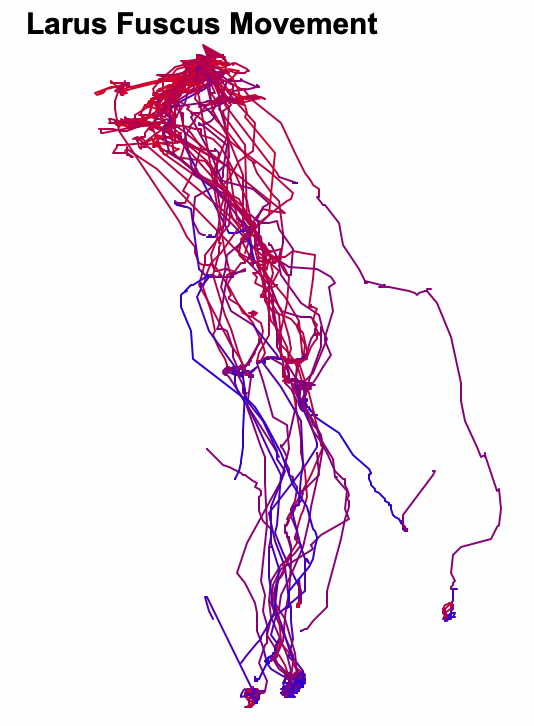

In [ ]:
from PIL import Image
img = Image.open('birdviz.png')
display(img)